# Model - Tensorflow Hub!
Of course we must include Tensorflow and TF2.0 has become so much easier to use with hub!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

tf.__version__, hub.__version__

('2.0.0-beta1', '0.5.0')

In [2]:
df = pd.read_csv('../data/preproc_nps_2018.csv')

In [ ]:
df.head()

In [4]:
df.label = df.label.apply(lambda x: 1 if x == 'positive' else 0)

In [5]:
np.sum(df.is_valid), np.sum(np.logical_not(df.is_valid))

(179791, 20209)

In [6]:
train_df = df[df.is_valid]
val_df = df[np.logical_not(df.is_valid)]

In [7]:
train_df.shape, val_df.shape

((179791, 3), (20209, 3))

In [8]:
X_train = train_df.text.values
X_val = val_df.text.values
y_train = train_df.label.values
y_val = val_df.label.values

In [9]:
def show_training_curve(history):
    history_dict = history.history
    
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    f, ax = plt.subplots(1, 2, figsize=(20, 4))

    ax[0].plot(epochs, loss, 'bo', label='Training loss')
    ax[0].plot(epochs, val_loss, 'b', label='Validation loss')
    ax[0].set_title('Training and validation loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    
    ax[1].plot(epochs, acc, 'bo', label='Training acc')
    ax[1].plot(epochs, val_acc, 'b', label='Validation acc')
    ax[1].set_title('Training and validation accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

### Let's try the small yet powerful pre-trained model
Model detail - https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1

In [10]:
gnews_swivel_model = tf.keras.Sequential()
gnews_swivel_model.add(hub.KerasLayer('https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1',
                         output_shape=[20], input_shape=[], dtype=tf.string, trainable=True))
gnews_swivel_model.add(tf.keras.layers.Dense(16, activation='relu'))
gnews_swivel_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

gnews_swivel_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                389380    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 389,733
Trainable params: 389,733
Non-trainable params: 0
_________________________________________________________________


In [11]:
gnews_swivel_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = gnews_swivel_model.fit(X_train, y_train,
                                 epochs=16,
                                 batch_size=256,
                                 validation_data=(X_val, y_val),
                                 verbose=1)

W0716 23:34:56.739943 4582708672 deprecation.py:323] From /anaconda3/envs/tf2/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 179791 samples, validate on 20209 samples
Epoch 1/16
179791/179791 [==============================] - 4s 20us/sample - loss: 0.3840 - accuracy: 0.8286 - val_loss: 0.2926 - val_accuracy: 0.8829
Epoch 2/16
179791/179791 [==============================] - 3s 18us/sample - loss: 0.2752 - accuracy: 0.8885 - val_loss: 0.2732 - val_accuracy: 0.8900
Epoch 3/16
179791/179791 [==============================] - 3s 19us/sample - loss: 0.2596 - accuracy: 0.8954 - val_loss: 0.2674 - val_accuracy: 0.8912
Epoch 4/16
179791/179791 [==============================] - 3s 18us/sample - loss: 0.2513 - accuracy: 0.8989 - val_loss: 0.2641 - val_accuracy: 0.8941
Epoch 5/16
179791/179791 [==============================] - 3s 18us/sample - loss: 0.2454 - accuracy: 0.9007 - val_loss: 0.2636 - val_accuracy: 0.8928
Epoch 6/16
179791/179791 [==============================] - 3s 18us/sample - loss: 0.2408 - accuracy: 0.9022 - val_loss: 0.2619 - val_accuracy: 0.8915
Epoch 7/16
179791/179791 [=================

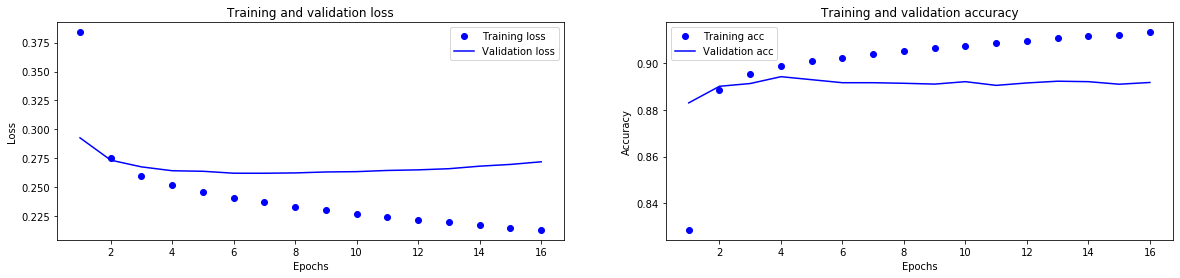

In [13]:
show_training_curve(history)

In [14]:
gnews_swivel_model.save('../models/gnews_swivel_16_ep_model.h5')

### Now we move on to a more powerful model with 100x more parameters to train
Model detail - https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1

In [15]:
nnlm_en_50_model = tf.keras.Sequential()
nnlm_en_50_model.add(hub.KerasLayer('https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1',
                                    output_shape=[50], input_shape=[], dtype=tf.string, trainable=True))
nnlm_en_50_model.add(tf.keras.layers.Dense(16, activation='relu'))
nnlm_en_50_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

nnlm_en_50_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_2 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [16]:
nnlm_en_50_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = nnlm_en_50_model.fit(X_train, y_train,
                               epochs=16,
                               batch_size=256,
                               validation_data=(X_val, y_val),
                               verbose=1)

Train on 179791 samples, validate on 20209 samples
Epoch 1/16
179791/179791 [==============================] - 488s 3ms/sample - loss: 0.3095 - accuracy: 0.8735 - val_loss: 0.2467 - val_accuracy: 0.9003
Epoch 2/16
179791/179791 [==============================] - 483s 3ms/sample - loss: 0.2199 - accuracy: 0.9139 - val_loss: 0.2448 - val_accuracy: 0.8993
Epoch 3/16
179791/179791 [==============================] - 474s 3ms/sample - loss: 0.2021 - accuracy: 0.9215 - val_loss: 0.2486 - val_accuracy: 0.8985
Epoch 4/16
179791/179791 [==============================] - 477s 3ms/sample - loss: 0.1907 - accuracy: 0.9254 - val_loss: 0.2567 - val_accuracy: 0.8965
Epoch 5/16
179791/179791 [==============================] - 474s 3ms/sample - loss: 0.1818 - accuracy: 0.9280 - val_loss: 0.2646 - val_accuracy: 0.8967
Epoch 6/16
179791/179791 [==============================] - 473s 3ms/sample - loss: 0.1747 - accuracy: 0.9307 - val_loss: 0.2718 - val_accuracy: 0.8964
Epoch 7/16
179791/179791 [===========

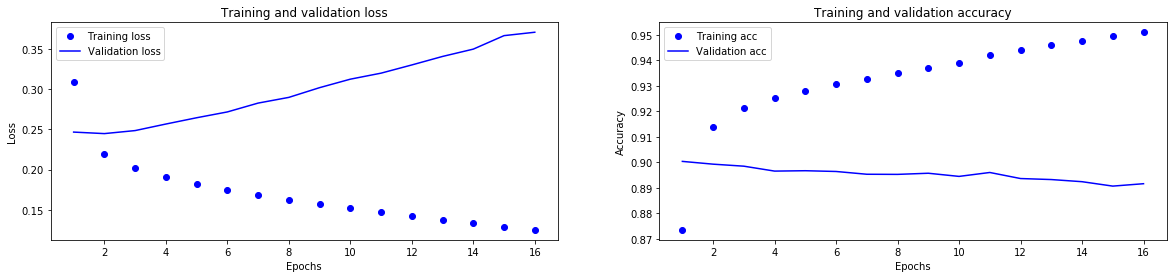

In [18]:
show_training_curve(history)

In [19]:
nnlm_en_50_model.save('../models/nnlm_en_50_16_ep_model.h5')

### Now we move on to a superman model (over 100M paramters)
Model detail - https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1

In [20]:
nnlm_en_128_model = tf.keras.Sequential()
nnlm_en_128_model.add(hub.KerasLayer('https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1',
                                     output_shape=[128], input_shape=[], dtype=tf.string, trainable=True))
nnlm_en_128_model.add(tf.keras.layers.Dense(16, activation='relu'))
nnlm_en_128_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

nnlm_en_128_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 128)               124642688 
_________________________________________________________________
dense_4 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 124,644,769
Trainable params: 124,644,769
Non-trainable params: 0
_________________________________________________________________


In [21]:
nnlm_en_128_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = nnlm_en_128_model.fit(X_train, y_train,
                                epochs=16,
                                batch_size=256,
                                validation_data=(X_val, y_val),
                                verbose=1)

Train on 179791 samples, validate on 20209 samples
Epoch 1/16
179791/179791 [==============================] - 1149s 6ms/sample - loss: 0.2824 - accuracy: 0.8886 - val_loss: 0.2441 - val_accuracy: 0.9014
Epoch 2/16
179791/179791 [==============================] - 1148s 6ms/sample - loss: 0.2142 - accuracy: 0.9165 - val_loss: 0.2436 - val_accuracy: 0.9015
Epoch 3/16
179791/179791 [==============================] - 1148s 6ms/sample - loss: 0.1963 - accuracy: 0.9228 - val_loss: 0.2512 - val_accuracy: 0.8990
Epoch 4/16
179791/179791 [==============================] - 1148s 6ms/sample - loss: 0.1839 - accuracy: 0.9277 - val_loss: 0.2606 - val_accuracy: 0.8976
Epoch 5/16
179791/179791 [==============================] - 1149s 6ms/sample - loss: 0.1744 - accuracy: 0.9314 - val_loss: 0.2746 - val_accuracy: 0.8981
Epoch 6/16
179791/179791 [==============================] - 1149s 6ms/sample - loss: 0.1659 - accuracy: 0.9351 - val_loss: 0.2858 - val_accuracy: 0.8955
Epoch 7/16
179791/179791 [=====

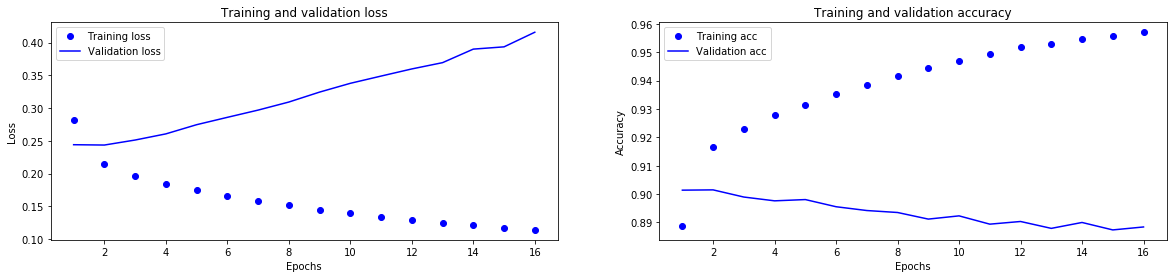

In [23]:
show_training_curve(history)

In [24]:
nnlm_en_128_model.save('../models/nnlm_en_128_16_ep_model.h5')

### Just one epoch (a fairer comparison perhaps? and the model definitely overfits our training anyway)

In [25]:
gnews_swivel_1_ep_model = tf.keras.Sequential()
gnews_swivel_1_ep_model.add(hub.KerasLayer('https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1',
                            output_shape=[20], input_shape=[], dtype=tf.string, trainable=True))
gnews_swivel_1_ep_model.add(tf.keras.layers.Dense(16, activation='relu'))
gnews_swivel_1_ep_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

gnews_swivel_1_ep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gnews_swivel_1_ep_model.fit(X_train, y_train, epochs=1, batch_size=256,
                            validation_data=(X_val, y_val), verbose=1)

gnews_swivel_1_ep_model.save('../models/gnews_swivel_1_ep_model.h5')

Train on 179791 samples, validate on 20209 samples
179791/179791 [==============================] - 3s 19us/sample - loss: 0.4246 - accuracy: 0.7934 - val_loss: 0.2956 - val_accuracy: 0.8785


In [26]:
nnlm_en_50_1_ep_model = tf.keras.Sequential()
nnlm_en_50_1_ep_model.add(hub.KerasLayer('https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1',
                                         output_shape=[50], input_shape=[], dtype=tf.string, trainable=True))
nnlm_en_50_1_ep_model.add(tf.keras.layers.Dense(16, activation='relu'))
nnlm_en_50_1_ep_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

nnlm_en_50_1_ep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nnlm_en_50_1_ep_model.fit(X_train, y_train, epochs=1, batch_size=256,
                          validation_data=(X_val, y_val), verbose=1)

nnlm_en_50_1_ep_model.save('../models/nnlm_en_50_1_ep_model.h5')

Train on 179791 samples, validate on 20209 samples
179791/179791 [==============================] - 460s 3ms/sample - loss: 0.3040 - accuracy: 0.8762 - val_loss: 0.2469 - val_accuracy: 0.9004


In [27]:
nnlm_en_128_1_ep_model = tf.keras.Sequential()
nnlm_en_128_1_ep_model.add(hub.KerasLayer('https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1',
                                          output_shape=[128], input_shape=[], dtype=tf.string, trainable=True))
nnlm_en_128_1_ep_model.add(tf.keras.layers.Dense(16, activation='relu'))
nnlm_en_128_1_ep_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

nnlm_en_128_1_ep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nnlm_en_128_1_ep_model.fit(X_train, y_train, epochs=1, batch_size=256,
                           validation_data=(X_val, y_val), verbose=1)

nnlm_en_128_1_ep_model.save('../models/nnlm_en_128_1_ep_model.h5')

Train on 179791 samples, validate on 20209 samples
179791/179791 [==============================] - 1146s 6ms/sample - loss: 0.2811 - accuracy: 0.8879 - val_loss: 0.2424 - val_accuracy: 0.9020


In [31]:
nnlm_en_128_1_ep_model.predict(np.array(['your flight sucks']))

array([[0.00919178]], dtype=float32)

In [32]:
nnlm_en_128_1_ep_model.predict(np.array(['your cabin crew gave me chocolate']))

array([[0.6416278]], dtype=float32)

In [36]:
nnlm_en_128_1_ep_model.predict(np.array(['the cabin was very smelly']))

array([[0.22790857]], dtype=float32)